# Nama: Bintang Jonika Putra Melayu
# NIM   : 202131155

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Import Gambar

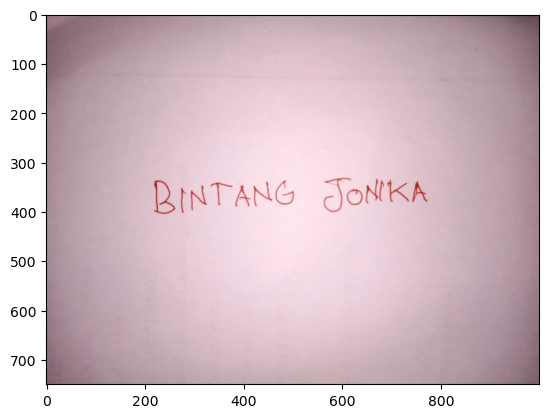

In [2]:
gambar = cv.imread('nama.jpg')
tinggi, lebar, _ = gambar.shape

if lebar > 1000:
    rasio_skala = lebar / 1000
    lebar = 1000
    tinggi = int(tinggi / rasio_skala)

gambar = cv.resize(gambar, (lebar, tinggi))
plt.imshow(gambar)

# Convert ke Binary

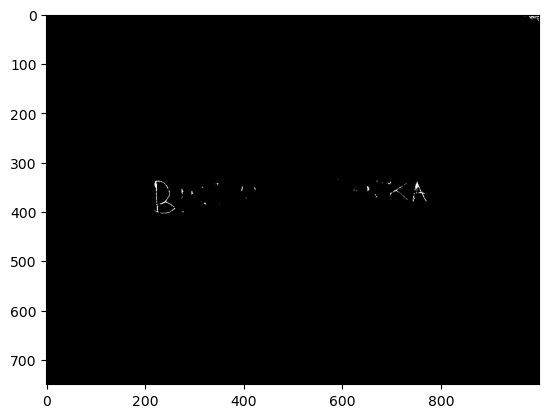

In [3]:
def thresholding(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(img_gray, 80, 255, cv.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(gambar)

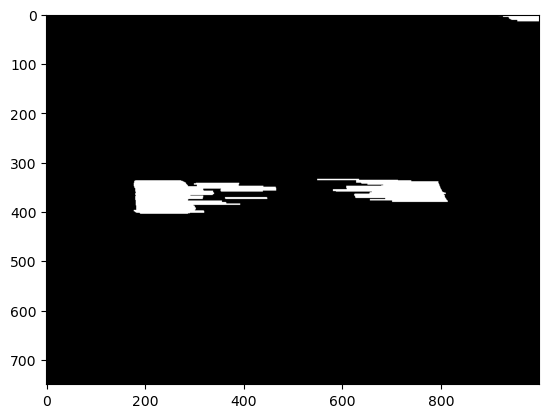

In [4]:
kernel = np.ones((3,85), np.uint8)
dilated = cv.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap = 'gray')

# Mencari kontur pada gambar

In [5]:
(contours, hirarki) = cv.findContours(dilated.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
sorted_contours_line = sorted(contours, key = lambda ctr : cv.boundingRect(ctr)[1])

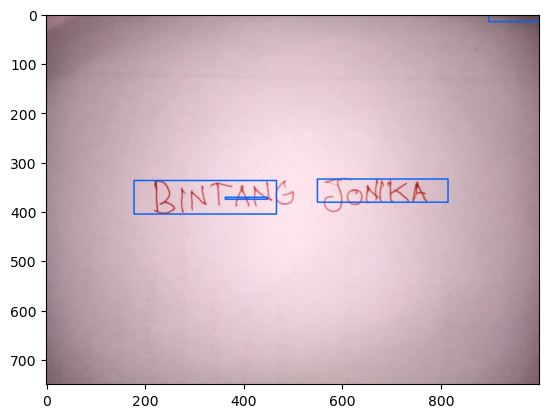

In [6]:
gambar2 = gambar.copy()

for ctr in sorted_contours_line:
    
    x,y,w,h = cv.boundingRect(ctr)
    cv.rectangle(gambar2, (x,y), (x+w, y+h), (4, 100, 250), 2)
    
plt.imshow(gambar2)

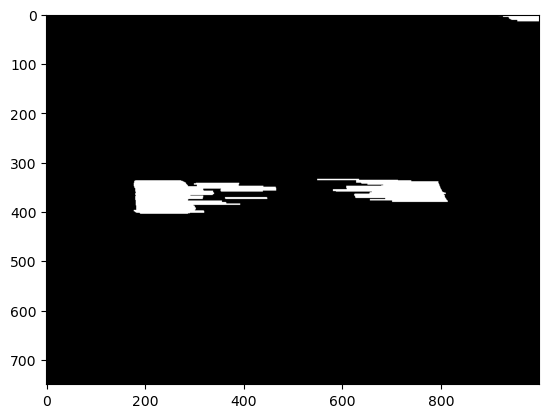

In [7]:
kernel = np.ones((3,5), np.uint8)
dilated2 = cv.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap = 'gray')

# Segmentasi kata

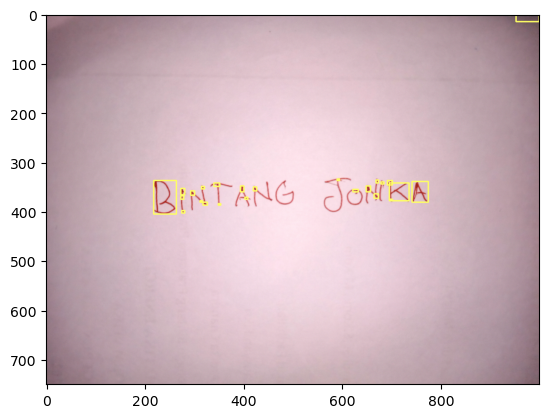

In [9]:
gambar3 = gambar.copy()

for line in sorted_contours_line:
    x, y, w, h = cv.boundingRect(line)
    roi_line = dilated2[y:y+h, x:x+w]
    
    (cnt, _) = cv.findContours(roi_line.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    sorted_contours_word = sorted(cnt, key=lambda ctr2: cv.boundingRect(ctr2)[0])
    
    for word in sorted_contours_word:
        x2, y2, w2, h2 = cv.boundingRect(word)
        
        huruf = roi_line[y2:y2+h2, x2:x2+w2]
        
        cv.rectangle(gambar3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255, 255, 100), 2)
        
plt.imshow(gambar3)
